## CS/INFO 5304 Assignment 1: Data Preparation <br />


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.stats as stats
import statistics

In [2]:
data = pd.read_pickle('./Extrasensory_individual_data.p', compression='infer')
sensorData = pd.read_pickle('./Extrasensory_sensor_data.p', compression='infer')

### Case 1: Actual screen time


Text(0.5, 1.0, 'Histogram of Actual Average Screen Time')

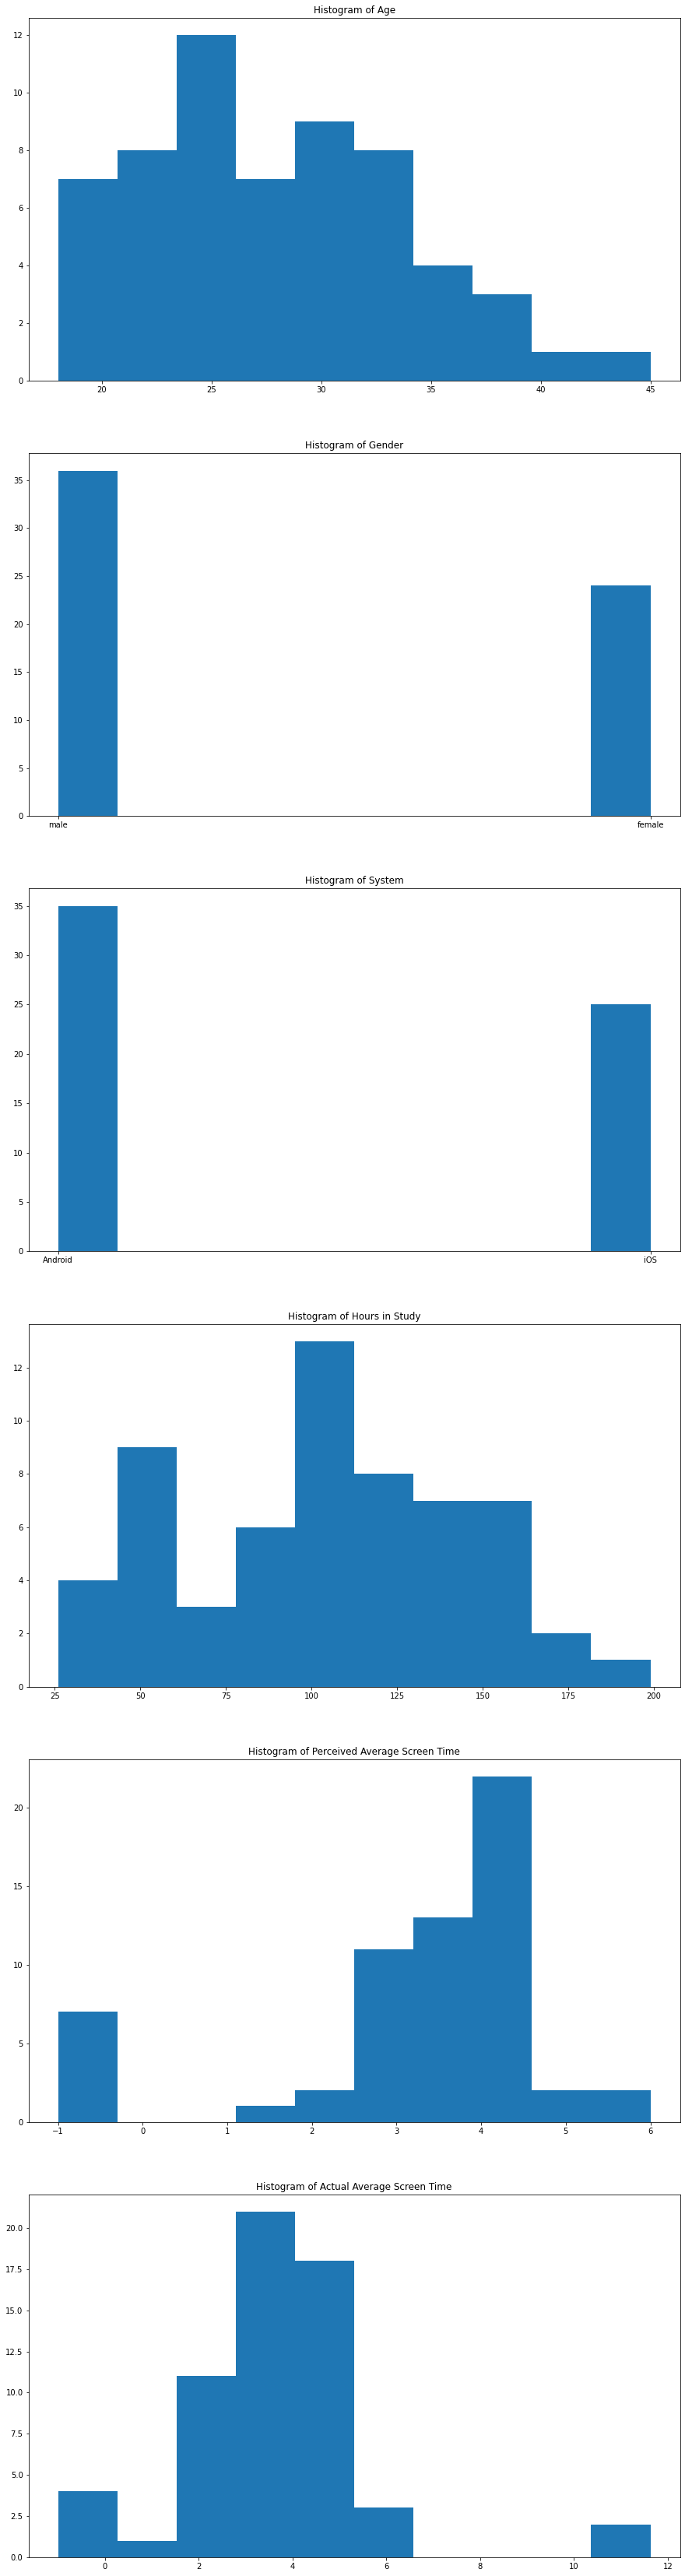

In [3]:
## Case 1 Problem A code (and optional graph)

#Plot
plt.figure(figsize=(15,60))
plt.subplot(6,1,1)
plt.hist(data['age'])
plt.title('Histogram of Age')

plt.subplot(6,1,2)
plt.hist(data['gender'])
plt.title('Histogram of Gender')

plt.subplot(6,1,3)
plt.hist(data['system'])
plt.title('Histogram of System')

plt.subplot(6,1,4)
plt.hist(data['hours_in_study'])
plt.title('Histogram of Hours in Study')

plt.subplot(6,1,5)
plt.hist(data['perceived_average_screen_time'])
plt.title('Histogram of Perceived Average Screen Time')

plt.subplot(6,1,6)
plt.hist(data['actual_average_screen_time'])
plt.title('Histogram of Actual Average Screen Time')

In [4]:
# How are missing values represented for this feature
data.isnull().any()
#It looks like there are no null values
print(data['perceived_average_screen_time'].value_counts())
print(data['actual_average_screen_time'].value_counts())
#From the histogram, the missing value for perceived average screen time and actual average screen time is set to -1 

-1.0    7
 4.2    7
 4.3    5
 3.9    4
 3.8    4
 2.8    3
 3.1    2
 3.2    2
 3.5    2
 4.5    2
 4.0    2
 2.6    2
 3.0    2
 3.4    2
 3.6    2
 1.1    1
 4.1    1
 2.7    1
 2.5    1
 4.6    1
 2.0    1
 3.3    1
 6.0    1
 5.6    1
 4.4    1
 2.4    1
 5.1    1
Name: perceived_average_screen_time, dtype: int64
-1.00     4
 4.56     2
 3.23     2
 2.73     2
 4.76     1
 1.55     1
 5.05     1
 4.02     1
 4.08     1
 4.17     1
 3.49     1
 10.78    1
 3.66     1
 4.22     1
 3.87     1
 3.62     1
 2.65     1
 3.34     1
 5.17     1
 4.49     1
 1.76     1
 2.31     1
 3.69     1
 3.59     1
 3.72     1
 4.75     1
 3.74     1
 4.62     1
 2.57     1
 4.09     1
 11.63    1
 4.06     1
 3.01     1
 2.20     1
 1.49     1
 4.13     1
 5.69     1
 5.18     1
 3.71     1
 1.60     1
 3.30     1
 3.27     1
 2.58     1
 3.32     1
 5.07     1
 2.67     1
 3.39     1
 4.72     1
 3.73     1
 2.85     1
 4.43     1
 5.94     1
 3.65     1
 6.06     1
Name: actual_average_screen_time

#### Writeup Answer to Problem A: 
How are missing values represented for this feature?


From the histogram, the missing value for perceived average screen time and actual average screen time is set to -1

Text(0.5, 1.0, 'Histogram of Actual Average Screen Time')

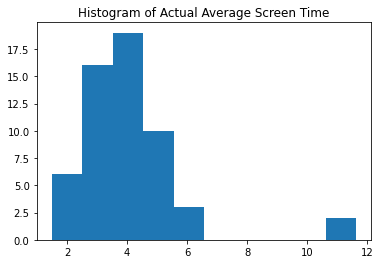

In [5]:
## Case 1 Problem B code and graph
tmp = data.query("actual_average_screen_time != -1")#Remove column that has missing value for actual_average_screen_time

#Histogram
# print(data_filtered['perceived_average_screen_time'].value_counts())
plt.hist(tmp ['actual_average_screen_time'])
plt.title('Histogram of Actual Average Screen Time')

In [6]:

#Does it have any outliers? If so, how many?
#Yes it has outliers, 10.78 and 11.63
tmp = data.query("actual_average_screen_time != -1")
q1 = tmp['actual_average_screen_time'].quantile(0.25)
q3 = tmp['actual_average_screen_time'].quantile(0.75)
iqr = q3-q1

low = q1 - 1.5*iqr
high = q3 + 1.5*iqr

count = 0
outliers = []
for entry in tmp['actual_average_screen_time']:
    if entry > high or entry < low:
        count += 1
        outliers.append(entry)

print("There are " + str(count) + " outliers and they are: " + str(outliers) + '.')

There are 2 outliers and they are: [10.78, 11.63].


In [7]:
# Is it skewed? If so, is it left skewed or right skewed? What’s the skewness?
skewness = tmp['actual_average_screen_time'].skew()
print(skewness)
#The data is highly skewed to the right with a skewness of 2.46. It is quite apparently by simply looking at the histogram previously.

2.4639261915800215


#### Writeup Answer to Problem B: 
 Does it have outliers?If so, how many?
 Is it skewed? If so, is it left skewed or right skewed? What’s the skewness? 


 Yes it has 2 outliers, 10.78 and 11.63.
 The data is highly skewed to the right with a skewness of 2.46. It is quite apparently by simply looking at the histogram previously.

/Users/qu4ntum/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/qu4ntum/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/qu4ntum/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

Text(0.5, 1.0, 'Histograms for Actual Average Screen Time')

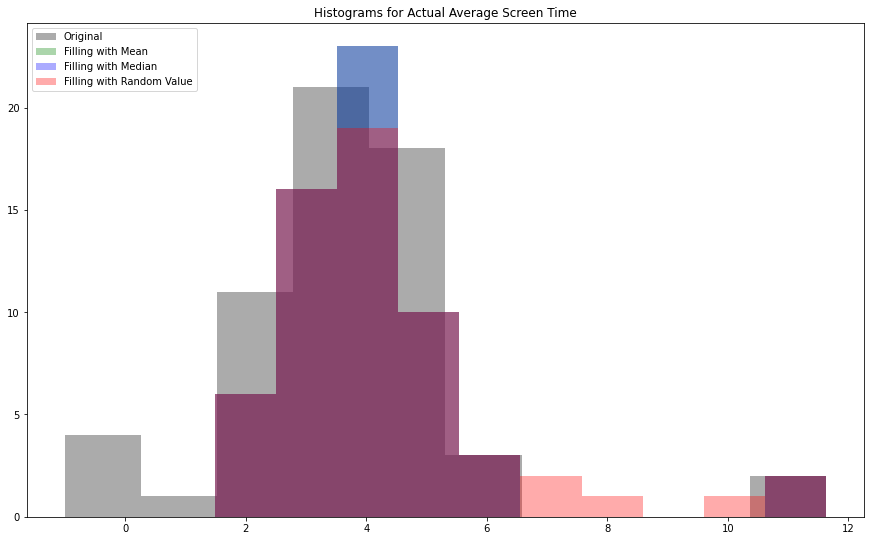

In [8]:
## Case 1 Problem C code and graph
#Filling with mean

mean1 = data['perceived_average_screen_time'].mean()
mean2 = data['actual_average_screen_time'].mean()
data_meanFill = data.copy(deep=True)

for i in range(len(data_meanFill['perceived_average_screen_time'])):
    if data_meanFill['perceived_average_screen_time'][i] == -1:
        data_meanFill['perceived_average_screen_time'][i] = mean1

for i in range(len(data_meanFill['actual_average_screen_time'])):
    if data_meanFill['actual_average_screen_time'][i] == -1:
        data_meanFill['actual_average_screen_time'][i] = mean2

#Filling with median
median1 = data['perceived_average_screen_time'].median()
median2 = data['actual_average_screen_time'].median()
data_medianFill = data.copy(deep=True)

for i in range(len(data_medianFill['perceived_average_screen_time'])):
    if data_medianFill['perceived_average_screen_time'][i] == -1:
        data_medianFill['perceived_average_screen_time'][i] = median1

for i in range(len(data_medianFill['actual_average_screen_time'])):
    if data_medianFill['actual_average_screen_time'][i] == -1:
        data_medianFill['actual_average_screen_time'][i] = median2

#Filling with a random value
data_randFill = data.copy(deep=True)

for i in range(len(data_randFill['perceived_average_screen_time'])):
    if data_randFill['perceived_average_screen_time'][i] == -1:
        data_randFill['perceived_average_screen_time'][i] = random.randint(1,int(max(tmp['perceived_average_screen_time'])))

for i in range(len(data_randFill['actual_average_screen_time'])):
    if data_randFill['actual_average_screen_time'][i] == -1:
        data_randFill['actual_average_screen_time'][i] = random.randint(1,int(max(tmp['actual_average_screen_time'])))

# plt.figure(figsize=(15,20))
# plt.subplot(2,1,1)
# plt.hist(data['perceived_average_screen_time'], label = 'Original', alpha = 0.33, color = 'black')
# plt.hist(data_meanFill['perceived_average_screen_time'], label = 'Filling with Mean', alpha = 0.33, color = 'green')
# plt.hist(data_medianFill['perceived_average_screen_time'], label = 'Filling with Median', alpha = 0.33, color = 'blue')
# plt.hist(data_randFill['perceived_average_screen_time'], label = 'Filling with Random Value', alpha = 0.33, color = 'red')
# plt.legend(loc='upper left')
# plt.title('Histograms for Perceived Average Screen Time')

plt.figure(figsize=(15,20))
plt.subplot(2,1,2)
plt.hist(data['actual_average_screen_time'], label = 'Original', alpha = 0.33, color = 'black')
plt.hist(data_meanFill['actual_average_screen_time'], label = 'Filling with Mean', alpha = 0.33, color = 'green')
plt.hist(data_medianFill['actual_average_screen_time'], label = 'Filling with Median', alpha = 0.33, color = 'blue')
plt.hist(data_randFill['actual_average_screen_time'], label = 'Filling with Random Value', alpha = 0.33, color = 'red')
plt.legend(loc='upper left')
plt.title('Histograms for Actual Average Screen Time')

#### Writeup Answer to Problem C: 
How did you choose the random value from method 3)? 
How do the distributions look like after you implement the three filling methods? (Compare them)


The random value is a random number from 0 to the maximum number of filtered dataset without outliers. The data looks to have less variance, range, and noise after using the filling methods. Intuitively, random filling has to be the worst. Mean filling and median filling are both expected to work quite well as they will not skew the distribution very much.

In [9]:
## Case 1 Problem D code and graph
np.random.seed(5) #Set a seed to ensure consistency in results

population = np.random.normal(3.75, 1.25, len(data))
d_meanFill = np.random.normal(statistics.mean(data_meanFill['actual_average_screen_time']), np.std(data_meanFill['actual_average_screen_time']), len(data_meanFill['actual_average_screen_time']))
d_medianFill = np.random.normal(statistics.mean(data_medianFill['actual_average_screen_time']), np.std(data_medianFill['actual_average_screen_time']), len(data_medianFill['actual_average_screen_time']))
d_randFill = np.random.normal(statistics.mean(data_randFill['actual_average_screen_time']), np.std(data_randFill['actual_average_screen_time']), len(data_randFill['actual_average_screen_time']))

t_meanFill, p_meanFill = stats.ttest_ind(population, d_meanFill)
t_medianFill, p_medianFill = stats.ttest_ind(population, d_medianFill)
t_randFill, p_randFill = stats.ttest_ind(population, d_randFill)

print("Mean-Fill vs population: "  + str(p_meanFill))
print("Median-Fill vs population: " + str(p_medianFill))
print("Random-Fill vs population: " + str(p_randFill))

Mean-Fill vs population: 0.7809508418309477
Median-Fill vs population: 0.7561977782670406
Random-Fill vs population: 0.7750005786231127


#### Answer to Problem D: 
Report the three p-values. Which one of the filling methods reconstruct this feature to be closest to the research distribution? Why do you think this is the case?


From the calculated p-values, filling with mean reconstruct this feature to be closest to the research distribution because it has the highest P value. A higher P values indicates that the distribution is closer to the true population.

### Case 2: Perceived average screen time

(array([ 1.,  1.,  2.,  8.,  9., 12., 16.,  1.,  1.,  2.]),
 array([1.1 , 1.59, 2.08, 2.57, 3.06, 3.55, 4.04, 4.53, 5.02, 5.51, 6.  ]),
 <BarContainer object of 10 artists>)

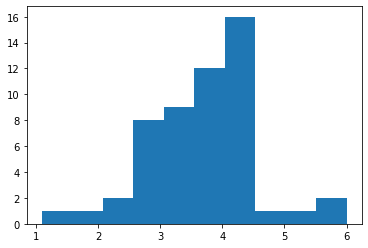

In [10]:
## Case 2 Problem A code and histogram

tmp = data.query("perceived_average_screen_time != -1")#Remove column that has missing value for perceived_average_screen_time
plt.hist(tmp['perceived_average_screen_time'])

In [11]:
q1 = tmp['perceived_average_screen_time'].quantile(0.25)
q3 = tmp['perceived_average_screen_time'].quantile(0.75)
iqr = q3-q1

low = q1 - 1.5*iqr
high = q3 + 1.5*iqr

count = 0
outliers = []
for entry in tmp['perceived_average_screen_time']:
    if entry > high or entry < low:
        count += 1
        outliers.append(entry)

print("There are " + str(count) + " outliers and they are: " + str(outliers) + '.')

skewness = tmp['perceived_average_screen_time'].skew()
print('The skewness is: ' + str(skewness))

There are 2 outliers and they are: [1.1, 6.0].
The skewness is: -0.21439363473731404


#### Writeup Answer to Problem B: 
 Does it have outliers?If so, how many? 
 Is it skewed? If so, is it left skewed or right skewed? What’s the skewness? 


Yes, there are two outliers, 1.1 and 6.0. The data is slightly skewed to the left with skewness value of -0.214.

In [12]:
## Case 2 Problem B code
count = 0
for value in tmp['actual_average_screen_time']:
    if value >= statistics.mean(tmp['actual_average_screen_time']) + np.std(tmp['actual_average_screen_time']):
        count += 1

print("There are " + str(count) + ' intense phone users.')

There are 5 intense phone users.


How many of them are intense phone users?

There are 5 intense phone users.

In [13]:
## Case 2 Problem C code and graph
b_missing = []
b_power = []
for value in data['perceived_average_screen_time']:
    if value == -1:
        b_missing.append(0)
        b_power.append(1)
    elif value >= statistics.mean(tmp['perceived_average_screen_time']) + np.std(tmp['perceived_average_screen_time']):
        bold_missing.append(1)
        b_power.append(0)
    else:
         b_missing.append(1)
         b_power.append(1)

chi_data = [b_missing, b_power]
stat, p, dof, expected = stats.chi2_contingency(chi_data)

print(p)

0.999999999999393


What is the p-value? Do you think they are correlated? What does this mean? Do you think this feature is MAR or MNAR? 

The P value is 0.99, which is greater than 0.05, I fail to reject the null hypothesis, therefore, they are dependent and the feature is MNAR.

### Case 3: Location

In [ ]:
people_2 = dict()

# for key, value in sensorData.items():
#     count = 0
#     for index, row in value.iterrows():
#         if row['lf_measurements:battery_level'] < 0.15 and pd.isna(row['location:raw_latitude']):
#             count+=1
#             people_2[key] = count

for key, value in sensorData.items():
    count = 0
    b_count = 0
    for index, row in value.iterrows():
        if row['lf_measurements:battery_level'] < 0.15 and pd.isna(row['location:raw_latitude']):
            count+=1
            b_count+=1
            if (count/b_count) > 0.95:
                people_2[key] = count
        elif row['lf_measurements:battery_level'] < 0.15:
            b_count += 1
            
# for battery_percentage in entry['lf_measurements:battery_level']
# print(entry['lf_measurements:battery_level'])

print(people_2)
  


{'3600D531-0C55-44A7-AE95-A7A38519464E': 10, '0E6184E1-90C0-48EE-B25A-F1ECB7B9714E': 737, '2C32C23E-E30C-498A-8DD2-0EFB9150A02E': 78, '098A72A5-E3E5-4F54-A152-BBDA0DF7B694': 277, 'CDA3BBF7-6631-45E8-85BA-EEB416B32A3C': 7, '4E98F91F-4654-42EF-B908-A3389443F2E7': 331, '40E170A7-607B-4578-AF04-F021C3B0384A': 26, '96A358A0-FFF2-4239-B93E-C7425B901B47': 104, '481F4DD2-7689-43B9-A2AA-C8772227162B': 108, '86A4F379-B305-473D-9D83-FC7D800180EF': 345, 'BEF6C611-50DA-4971-A040-87FB979F3FC1': 30, '665514DE-49DC-421F-8DCB-145D0B2609AD': 533, 'B09E373F-8A54-44C8-895B-0039390B859F': 182, 'B7F9D634-263E-4A97-87F9-6FFB4DDCB36C': 4, '61976C24-1C50-4355-9C49-AAE44A7D09F6': 3, 'F50235E0-DD67-4F2A-B00B-1F31ADA998B9': 1}


explanation of implementation

"people_2" is a dictionary that stores the people who behaves as 2) and number of minutes of location data have lost. "count" keep tracks of how many minutes of data is lost for each people. "b_count" keep tracks of how many minutes of data has battery level lower than 15%.
For each entry in the sensorData, I will look for all data points that have battery < 15% and raw_latitude is missing. For each data points, I will add one to the "count" and "b_count", if the data is not missing but battery < 15%, I will only add it to "b_count". Eventually, if more than 95% of the time that a user have < 15% battery level and data is missing at the same time, it means that it is a consistent behavior of the user and thus the data will be appended to people_2.


In [ ]:
## Case 3 Problem B code and graph
subject = sensorData['F50235E0-DD67-4F2A-B00B-1F31ADA998B9']

subject_forward = subject.copy(deep=True)
subject_forward['location:raw_latitude'] = subject_forward['location:raw_latitude'].interpolate(method ='linear', limit_direction ='forward')
# prev = list(subject_forward['location:raw_latitude'])[0]
# for key, value in sensorData.items():
#     for index, row in value.iterrows():
#         if pd.isna(row['location:raw_latitude']):
#             row['location:raw_latitude'] = prev
#             prev = row['location:raw_latitude']
#         else:
#             prev = row['location:raw_latitude']


subject_backward = subject.copy(deep=True)
subject_backward['location:raw_latitude'] = subject_backward['location:raw_latitude'].interpolate(method ='linear', limit_direction ='backward')
# next = list(subject_forward['location:raw_latitude'])[1]
# index = 1
# for key, value in sensorData.items():
#     for index, row in value.iterrows():
#         if pd.isna(row['location:raw_latitude']):
#             row['location:raw_latitude'] = next
#             count+=1
#             next = list(subject_forward['location:raw_latitude'])[count]
#         else:
#             count+=1
#             next = list(subject_forward['location:raw_latitude'])[count]

subject_linear = subject.copy(deep=True)
subject_linear['location:raw_latitude'] = subject_linear['location:raw_latitude'].interpolate(method = 'linear')





Text(0.5, 1.0, 'Line Graphs Using Different Filling Methods')

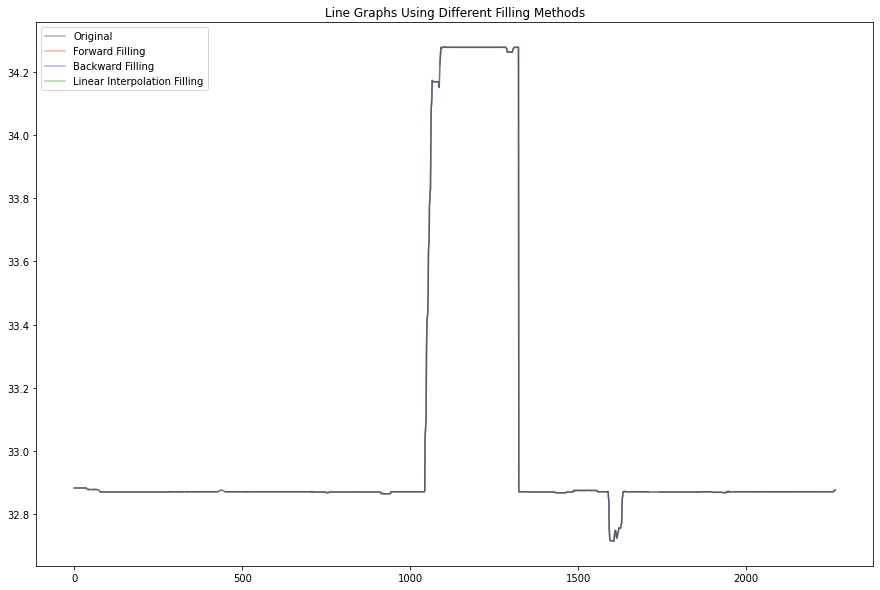

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(subject['location:raw_latitude'], label = 'Original', alpha = 0.33, color = 'black')
plt.plot(subject_forward['location:raw_latitude'], label = 'Forward Filling', alpha = 0.33, color = 'red')
plt.plot(subject_backward['location:raw_latitude'], label = 'Backward Filling', alpha = 0.33, color = 'blue')
plt.plot(subject_linear['location:raw_latitude'], label = 'Linear Interpolation Filling', alpha = 0.33, color = 'green')
plt.legend(loc='upper left')
plt.title('Line Graphs Using Different Filling Methods')


Compare the 4 traces. What do you see? If you were to use this dataset for further analysis, which filling method will you choose? 


The 4 lines generally overlaps each other. But if I were to choose a filling method, I would choose the linear interpolation. If you zoom in very closely, there is some difference around 500 where there is a small bump, and linear interpolation is the smoothest.